### Dataset : https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
batch_size = 10

In [3]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Splitting Dataset

In [6]:
train_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [8]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="validation",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [9]:
class_names = train_data_set.class_names

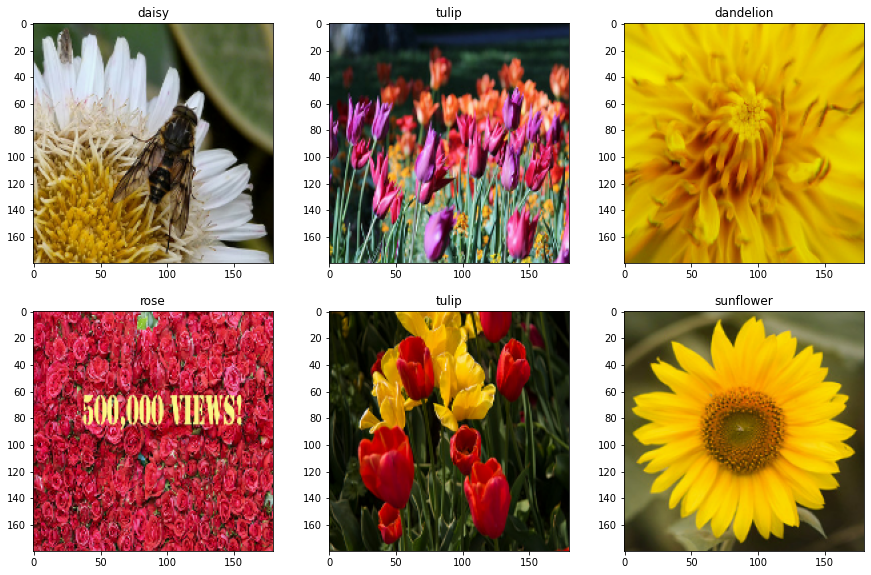

In [10]:
plt.figure(figsize=(15, 15))
for images, labels in train_data_set.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

> Normalizing pixel value from 0 - 255 to 0 - 1

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
dataset_normalized = train_data_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


### Model making

In [13]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  # adding convolutional layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # adding maxpooling layer
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding flatten
  layers.Flatten(),
  # adding dense hidden layer
  layers.Dense(128, activation='relu'),
  # adding dense output layer
  layers.Dense(num_classes)
])

### Compilation

In [14]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

### Fitting

In [15]:
epochs=15
history = model.fit(train_data_set,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
324/324 [==============================] - 58s 175ms/step - loss: 1.2925 - accuracy: 0.4518 - val_loss: 1.0578 - val_accuracy: 0.5941
Epoch 2/15
324/324 [==============================] - 49s 152ms/step - loss: 0.9906 - accuracy: 0.5982 - val_loss: 1.2260 - val_accuracy: 0.5607
Epoch 3/15
324/324 [==============================] - 52s 161ms/step - loss: 0.9289 - accuracy: 0.6461 - val_loss: 0.9752 - val_accuracy: 0.6108
Epoch 4/15
324/324 [==============================] - 52s 161ms/step - loss: 0.8754 - accuracy: 0.6643 - val_loss: 1.0219 - val_accuracy: 0.6033
Epoch 5/15
324/324 [==============================] - 58s 178ms/step - loss: 0.8092 - accuracy: 0.6896 - val_loss: 0.9683 - val_accuracy: 0.6135
Epoch 6/15
324/324 [==============================] - 56s 173ms/step - loss: 0.7686 - accuracy: 0.7103 - val_loss: 0.9412 - val_accuracy: 0.6376
Epoch 7/15
324/324 [==============================] - 53s 164ms/step - loss: 0.7500 - accuracy: 0.7109 - val_loss: 0.8898 - val_ac

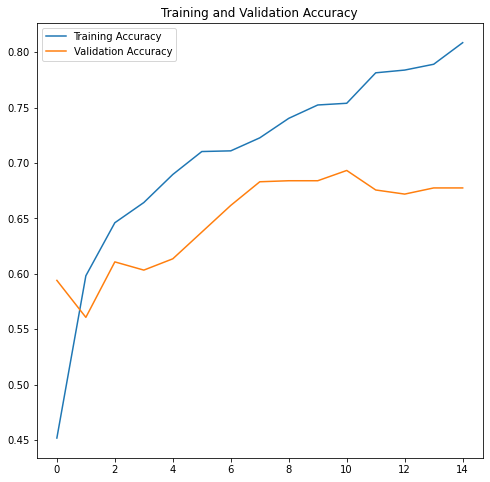

In [16]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


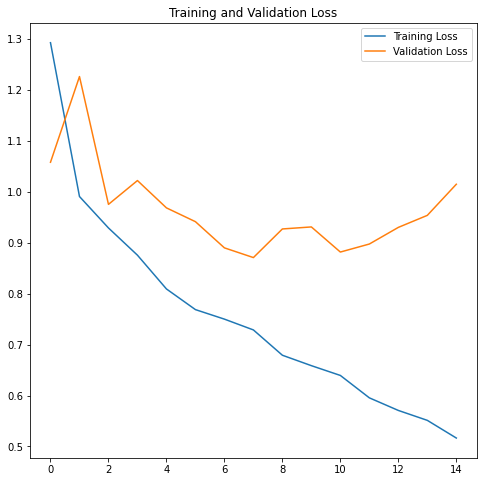

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save("flowers.h5")

In [19]:
model.load_weights('flowers.h5')

### Testing

In [21]:
sunflower_path = "flowers/daisy/5547758_eea9edfd54_n.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)],100 * np.max(score))

1/1 [==============================] - 0s 97ms/step
<PIL.Image.Image image mode=RGB size=180x180 at 0x26012884580>
daisy 99.9055802822113
